# Modeling: 

## Linear Regression (Base Model)

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define/Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Linear Regression](#7_Modeling:_Linear_Regression)
    * [7.1 Fitting Linear Regression](#7.1_Fitting_Linear_Regression)
    * [7.2 Linear Regression: intercept & Coefficients](#7.2_Linear_Regression:_intercept_&_Coefficients)
    * [7.3 Linear Regression: Residuals Visualization](#7.3_Linear_Regression:_Residuals_Visualization)
    * [7.4 Linear Regression Model Evaluation](#7.4_Linear_Regression_Model_Evaluation)
    * [7.5 Features Selection](#7.5_Features_Selection)
       * [7.5.1 Dropping 'malls' and 'university_count'](#7.5.1_Dropping_malls_university_count)
       * [7.5.2 Dropping 'malls', 'university_count' and 'property_age'](#7.5.2_Dropping_malls_university_count_property_age)
       * [7.5.3 Dropping 'malls', 'university_count', 'property_age' , 'barts', and 'days_on_market'](#7.5.3_Dropping_malls_university_count_property_age_barts_days_on_market)
    * [7.6 Features Selection Summary](#7.6_Features_Selection_Summary)
    * [7.7 Linear Regression Actual vs Prediction Visualization](#7.7_Linear_Regression_Actual_vs_Prediction_Visualization)
 * [8. Models next step](#8_Models_next_step)    

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Support Vector Regression
 * Stacking
 * Neural networks.
 
**In This Notebook, We'll be using Linear Regression (Baseline Model).**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [4]:
# Check Current Directory:
os.getcwd()

'C:\\Users\\aktha\\Desktop\\Future\\GOALLLLL\\capstone_two_House_Prices\\Modeling'

In [5]:
# Changing the directory:
os.chdir(r"C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Feature_Engineering/datasets")

In [6]:
#Confirm the directory:
os.getcwd()

'C:\\Users\\aktha\\Desktop\\Future\\GOALLLLL\\capstone_two_House_Prices\\Feature_Engineering\\datasets'

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,price,beds,baths,sqft,lot_size,days_on_market,price_per_sqft,hoa_month,...,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize
0,1,94568,905000,3,4,1994,0,80,454,388.0,...,119637,83.72,94.25,73.19,0,1,0,0,12,284.857
1,2,94566,645000,2,2,1221,1237,143,528,379.0,...,126782,80.07,79.57,80.57,0,0,1,0,4,305.250
2,1,94588,940000,4,2,1928,2660,148,488,470.0,...,134451,85.91,87.06,84.76,0,1,1,0,8,321.333
3,0,94588,1036000,3,2,1355,7708,66,765,33.0,...,134451,85.91,87.06,84.76,0,1,1,0,6,271.000
4,0,94568,1250000,4,4,3083,3058,143,405,232.0,...,119637,83.72,94.25,73.19,0,1,0,0,16,385.375


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


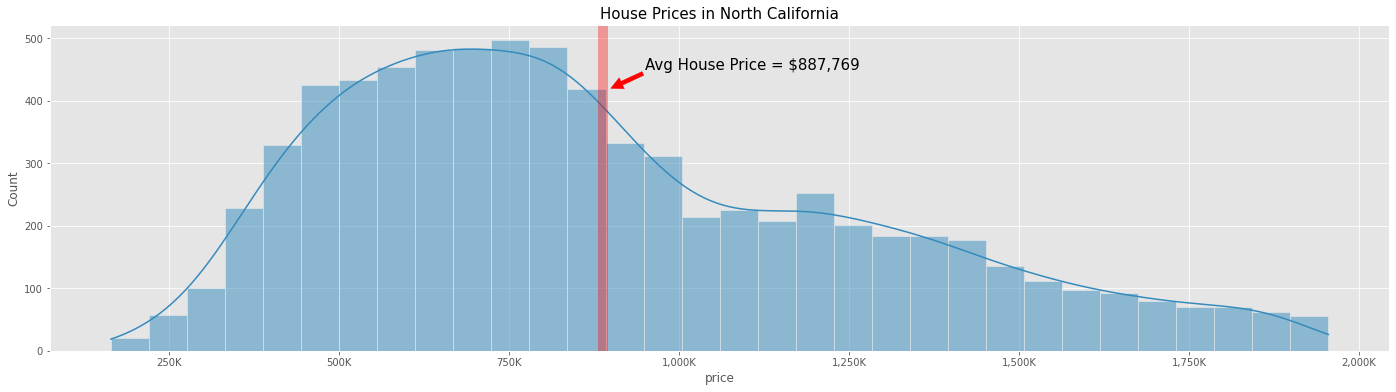

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Linear Regression<a id='7._Linear_Regression'></a>

Making a Linear Regression model: our first baseline model. Sklearn has a LinearRegression() function built into the linear_model module. We'll be using that to make our first regression model.

### 7.1 Fitting Linear Regression<a id='7.1_Fitting_Linear_Regression'></a>

In [17]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
lreg = LinearRegression()

# Fit the regressor to the training data
lreg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(lreg.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg = lreg.predict(X_test)




R-Squared coefficient : 93.4472 %


The above score is called **R-Squared coefficient**, or the **"coefficient of determination"**. It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. **At the moment, our Linear regression model explains 93.5% of the variation from the mean. which is a very good news for a baseline Model**

### 7.2 Linear Regression: intercept & Coefficients<a id='7.2_Linear_Regression:_intercept_&_Coefficients'></a>

In [18]:
print("Linear Regression - intercept: {:.3f}".format(lreg.intercept_))
print("--------------------------------------")
print("***Linear Regression - Coefficients***")
print(pd.DataFrame(lreg.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))
print("--------------------------------------")

Linear Regression - intercept: 888200.241
--------------------------------------
***Linear Regression - Coefficients***
                         coef
demand_score      23774469.08
supply_score       7219634.83
price_per_sqft      254471.51
sqft                187036.85
baths               124396.75
beds                124282.23
AvgRoomSize          48510.47
median_income        26188.86
school_rating        25215.83
lot_size             21782.18
hoa_month            15217.41
zipcode              13975.88
universities          9911.85
barts                 6556.78
property_age          5313.78
university_count       947.62
malls                  884.61
days_on_market       -6370.97
property_type        -9576.30
school_count        -10900.93
bedBath            -126978.23
hotness_score    -27024705.95
--------------------------------------


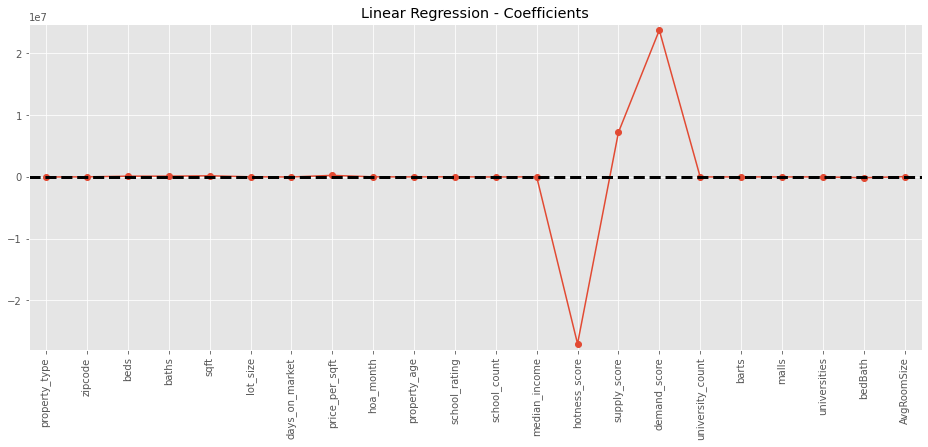

In [19]:
# Plot the coefficients
plt.subplots(figsize = (16,6))
plt.plot(range(len(X.columns)), lreg.coef_, marker='o')
plt.xticks(range(len(X.columns)), X.columns.values, rotation=90)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.title("Linear Regression - Coefficients")
plt.margins(0.02)
plt.show()

Linear Regression: intercept & Coefficients Summary:
 * From above Linear Regression coefficients, we can see that **Regularization** is needed: As we know Linear regression minmizes a loss function by choosing  a coefficient for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting easily. so, it is common practice to alter the loss function so that it penalizes for large coefficients using **Regularization**. So next, we'll be using both Ridge Regression and Lasso Regression.
 * Also, we can see that there're few features showing very low Coefficients i.e.  'malls', 'university_count', 'property_age', so if we drop them definteley we'll improve our predictions.
 




### 7.3 Linear Regression: Residuals Visualization<a id='7.3_Linear_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

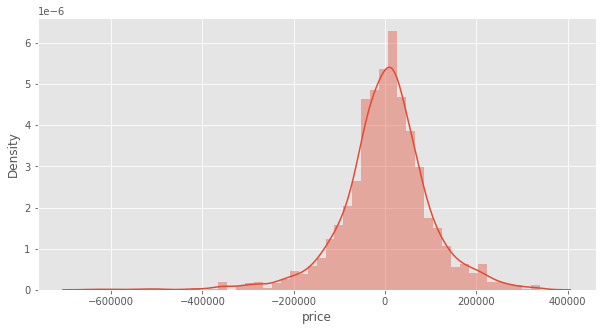

In [20]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_lreg)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.4 Linear Regression Model Evaluation<a id='7.4_Linear_Regression_Model_Evaluation'></a>

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [21]:
from sklearn import metrics

print("********Linear Regression Model Evaluation********")
print("--------------------------------------------------")
print("Linear Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg) * 100), '%')
print("--------------------------------------------------")
print("Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg)))
print("--------------------------------------------------")
print("Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lreg)))
print("--------------------------------------------------")
print("Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg))))
print("--------------------------------------------------")
print("Linear Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg) * 100), '%')
print("--------------------------------------------------")

********Linear Regression Model Evaluation********
--------------------------------------------------
Linear Regression - r2 Score: 93.4472 %
--------------------------------------------------
Linear Regression - MAE: 69515.8128
--------------------------------------------------
Linear Regression - MSE:9682059380.4426
--------------------------------------------------
Linear Regression - RMSE:98397.4562
--------------------------------------------------
Linear Regression - Variance Score:93.4490 %
--------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98397.45**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19. also, we have **very good variance score at 93.5%. This means that our initial algorithm is working and we're in the right track.**

### 7.5 Features Selection<a id='7.5_Features_Selection'></a>

As shown below let's try if we can improve predictions by dropping features with very low Coefficients:

In [22]:
print("***Linear Regression - Coefficients***")
print(pd.DataFrame(lreg.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

***Linear Regression - Coefficients***
                         coef
demand_score      23774469.08
supply_score       7219634.83
price_per_sqft      254471.51
sqft                187036.85
baths               124396.75
beds                124282.23
AvgRoomSize          48510.47
median_income        26188.86
school_rating        25215.83
lot_size             21782.18
hoa_month            15217.41
zipcode              13975.88
universities          9911.85
barts                 6556.78
property_age          5313.78
university_count       947.62
malls                  884.61
days_on_market       -6370.97
property_type        -9576.30
school_count        -10900.93
bedBath            -126978.23
hotness_score    -27024705.95


**Dropping Features:**
 * First step let's drop 'malls', 'university_count' the lowest Coefficients.
 * Next, let's drop 'malls', 'university_count' and 'property_age'.
 * Finally, let's drop 'malls', 'university_count', 'property_age', 'barts', and 'days_on_market'.
    

#### 7.5.1 Dropping 'malls' and 'university_count'<a id='7.5.1_Dropping_malls_university_count'></a>

In [23]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's drop  'malls' and 'university_count':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age',
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'barts', 'universities', 'bedBath', 
            'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [24]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [25]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [26]:
### Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
lreg_2 = LinearRegression()

# Fit the regressor to the training data
lreg_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned : {:.4f}".format(lreg_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg_2 = lreg_2.predict(X_test)


R-Squared coefficient Tuned : 93.4513 %


In [27]:
print("********Tuned Linear Regression Model Evaluation********")
print("--------------------------------------------------------")
print("Tuned Linear Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg_2) * 100), '%')
print("--------------------------------------------------------")
print("Tuned Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg_2)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lreg_2)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg_2))))
print("--------------------------------------------------------")
print("Tuned Linear Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg_2) * 100), '%')
print("--------------------------------------------------------")

********Tuned Linear Regression Model Evaluation********
--------------------------------------------------------
Tuned Linear Regression - r2 Score: 93.4513 %
--------------------------------------------------------
Tuned Linear Regression - MAE: 69477.6024
--------------------------------------------------------
Tuned Linear Regression - MSE:9676046249.8131
--------------------------------------------------------
Tuned Linear Regression - RMSE:98366.8961
--------------------------------------------------------
Tuned Linear Regression - Variance Score:93.4530 %
--------------------------------------------------------


#### 7.5.2 Dropping 'malls', 'university_count' and 'property_age'.<a id='7.5.2_Dropping_malls_university_count_property_age'></a>

In [28]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's drop  'malls', 'university_count' and 'property_age'.:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'barts', 'universities', 'bedBath', 
            'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [29]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [30]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [31]:
### Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
lreg_3 = LinearRegression()

# Fit the regressor to the training data
lreg_3.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned : {:.4f}".format(lreg_3.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg_3 = lreg_3.predict(X_test)

R-Squared coefficient Tuned : 93.4452 %


In [32]:
print("********Tuned Linear Regression Model Evaluation********")
print("--------------------------------------------------------")
print("Tuned Linear Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg_3) * 100), '%')
print("--------------------------------------------------------")
print("Tuned Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg_3)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lreg_3)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg_3))))
print("--------------------------------------------------------")
print("Tuned Linear Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg_3) * 100), '%')
print("--------------------------------------------------------")

********Tuned Linear Regression Model Evaluation********
--------------------------------------------------------
Tuned Linear Regression - r2 Score: 93.4452 %
--------------------------------------------------------
Tuned Linear Regression - MAE: 69372.9557
--------------------------------------------------------
Tuned Linear Regression - MSE:9685059694.4905
--------------------------------------------------------
Tuned Linear Regression - RMSE:98412.7009
--------------------------------------------------------
Tuned Linear Regression - Variance Score:93.4466 %
--------------------------------------------------------


#### 7.5.3 Dropping 'malls', 'university_count', 'property_age' , 'barts', and 'days_on_market'.<a id='7.5.3_Dropping_malls_university_count_property_age_barts_days_on_market'></a>

In [33]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's drop  'malls', 'university_count', 'property_age', 'barts', and 'days_on_market':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'price_per_sqft', 'hoa_month', 'school_rating', 'school_count', 
            'median_income', 'hotness_score', 'supply_score', 'demand_score', 
            'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [34]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [35]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [36]:
### Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
lreg_5 = LinearRegression()

# Fit the regressor to the training data
lreg_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned : {:.4f}".format(lreg_5.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred_lreg_5 = lreg_5.predict(X_test)

R-Squared coefficient Tuned : 93.4136 %


In [37]:
print("********Tuned Linear Regression Model Evaluation********")
print("--------------------------------------------------------")
print("Tuned Linear Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lreg_5) * 100), '%')
print("--------------------------------------------------------")
print("Tuned Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lreg_5)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lreg_5)))
print("--------------------------------------------------------")
print("Tuned Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lreg_5))))
print("--------------------------------------------------------")
print("Tuned Linear Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lreg_5) * 100), '%')
print("--------------------------------------------------------")

********Tuned Linear Regression Model Evaluation********
--------------------------------------------------------
Tuned Linear Regression - r2 Score: 93.4136 %
--------------------------------------------------------
Tuned Linear Regression - MAE: 69435.2387
--------------------------------------------------------
Tuned Linear Regression - MSE:9731797948.3080
--------------------------------------------------------
Tuned Linear Regression - RMSE:98649.8756
--------------------------------------------------------
Tuned Linear Regression - Variance Score:93.4154 %
--------------------------------------------------------


### 7.6 Features Selection Summary<a id='7.6_Features_Selection_Summary'></a>

As we can see below, when we're dropping 2 features ('malls', 'university_count'): we're seeing the best Result for Linear regression. 
    

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|93.4472 %|69515.8128|9682059380.4426|98397.4562|93.4490 %|
|Dropping 2 features    |93.4513 %|69477.6024|9676046249.8131|98366.8961|93.4530 %|
|Dropping 3 Features    |93.4452 %|69372.9557|9685059694.4905|98412.7009|93.4466 %|
|Dropping 5 Features    |93.4136 %|69435.2387|9731797948.3080|98649.8756|93.4154 %|

### 7.7 Linear Regression Actual vs Prediction Visualization<a id='7.7_Linear_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

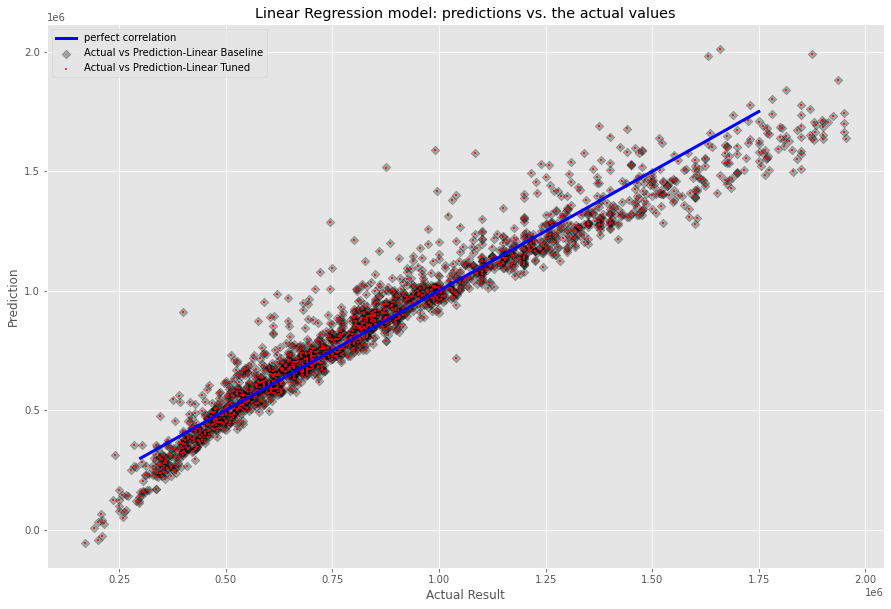

In [38]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_lreg, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Linear Baseline')
plt.scatter(y_test,y_pred_lreg_2, color='red', marker='+', s=5, alpha=0.75,label='Actual vs Prediction-Linear Tuned')
plt.title('Linear Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([300000,1750000],[300000,1750000],color = 'blue', linewidth=3, label='perfect correlation')
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [40]:
final_lreg = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted': y_pred_lreg_2.round(3)})
final_lreg.head(10).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted
696,1770000,1681441.151
4489,850000,916070.868
7400,825000,863829.774
3136,821000,751031.347
5011,820000,886364.118
535,750000,1096063.594
4969,705000,877434.696
4768,525000,530820.410
4032,525000,569184.781
5130,505000,563592.586


## 8. Models next step:<a id='8_Models_next_step'></a>

Now, after building our base Model: Linear regression, let's see if we can further improve our prediction using below algorithms:

 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))